<a href="https://colab.research.google.com/github/juszhou/NYUML/blob/main/Transfer_Learning_Copy_of_CIFAR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import Sequential, datasets, layers, models
from tensorflow.keras.layers import *
from tensorflow.keras.applications import DenseNet121, densenet
import matplotlib.pyplot as plt
import numpy as np


### Download the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = densenet.preprocess_input(train_images)
test_images = densenet.preprocess_input(test_images)
# make labels one-hot representation
train_labels_one_hot = tf.one_hot(train_labels, 10)[:, 0, :]
test_labels_one_hot = tf.one_hot(test_labels, 10)[:, 0, :]

170500096/170498071 [==============================] - 4s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

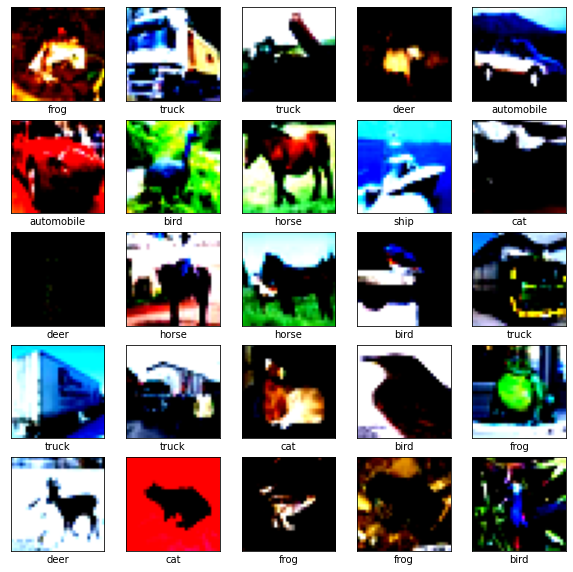

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Build Model

In [5]:
# TODO
# Replace this with your own model, use transfer learning.
# input tensor
inputs = K.Input(shape=(32, 32, 3))

# load base model
base_model = DenseNet121(include_top=False,
                                        weights='imagenet',
                                        input_shape=(160,160,3))
out = tf.keras.layers.experimental.preprocessing.Resizing(160,160)(inputs)
out = base_model(out)
out = K.layers.GlobalAveragePooling2D()(out)
# out = K.layers.Flatten()(out)
out = K.layers.BatchNormalization()(out)
out = K.layers.Dense(256, activation='relu')(out)
out = K.layers.Dropout(0.3)(out)
out = K.layers.BatchNormalization()(out)
out = K.layers.Dense(128, activation='relu')(out)
out = K.layers.Dropout(0.3)(out)
out = K.layers.BatchNormalization()(out)
out = K.layers.Dense(64, activation='relu')(out)
out = K.layers.Dropout(0.3)(out)
out = K.layers.Dense(10, activation='softmax')(out)
base_model.trainable = False

model = K.models.Model(inputs=inputs, outputs=out)

model.summary()

29089792/29084464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
resizing (Resizing)          (None, 160, 160, 3)       0         
_________________________________________________________________
densenet121 (Functional)     (None, 5, 5, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
______________________________________________________________

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_CNN = model.fit(train_images, train_labels_one_hot,
                        batch_size=128, epochs=20,
                        validation_data=(test_images, test_labels_one_hot), workers=32)

Epoch 1/30
391/391 [==============================] - 135s 250ms/step - loss: 0.6452 - accuracy: 0.7915 - val_loss: 0.3299 - val_accuracy: 0.8890
Epoch 2/30
391/391 [==============================] - 96s 244ms/step - loss: 0.3842 - accuracy: 0.8760 - val_loss: 0.2933 - val_accuracy: 0.9012
Epoch 3/30
391/391 [==============================] - 97s 249ms/step - loss: 0.3324 - accuracy: 0.8943 - val_loss: 0.2888 - val_accuracy: 0.8998
Epoch 4/30
391/391 [==============================] - 98s 252ms/step - loss: 0.3019 - accuracy: 0.9029 - val_loss: 0.2817 - val_accuracy: 0.9042
Epoch 5/30
391/391 [==============================] - 98s 252ms/step - loss: 0.2795 - accuracy: 0.9095 - val_loss: 0.2787 - val_accuracy: 0.9074
Epoch 6/30
391/391 [==============================] - 99s 253ms/step - loss: 0.2580 - accuracy: 0.9162 - val_loss: 0.2756 - val_accuracy: 0.9083
Epoch 7/30
391/391 [==============================] - 99s 253ms/step - loss: 0.2437 - accuracy: 0.9198 - val_loss: 0.2772 - val_a

In [7]:
#y_hat = loadedModel.predict(test_images)
#y_hat = tf.argmax(y_hat, axis=1)
#np.mean(y_hat == test_labels[:,0])